# **PART B - Deep Learning (MNIST)**



### Implement an image classifier using a deep learning network. [Hint: You may wish to refer to papers on successful DL architectures such as AlexNet]

Write a short report (e.g. in Notebook) detailing your implementation, your
experiments and analysis. In particular, we'd like to know:

• How is your prediction task defined? And what is the meaning of the
output variable?

• How do you represent your data as features?

• Did you process the features in any way?

• Did you bring in any additional sources of data?

• How did you select which DL model to use?

• Did you try to tune the hyperparameters of the learning algorithm, and in
that case how?

• How do you evaluate the quality of your system?

• Can you say anything about the errors that the system makes? 
For a classification task, you may consider a confusion matrix.

• Is it possible to say something about which features the model considers
important? (Whether this is possible depends on the type of classifier
you are using)
• Provide a reference section for any papers, online articles, books,
publications that you have referenced.

# Prediction task definition :

To classify/recognise handwritten digit images



# Output variable : the digits (0-9)






• How do you represent your data as features?

• Did you process the features in any way?

• Did you bring in any additional sources of data?

• How did you select which DL model to use?

• Did you try to tune the hyperparameters of the learning algorithm, and in
that case how?

• How do you evaluate the quality of your system?

• Can you say anything about the errors that the system makes? 
For a classification task, you may consider a confusion matrix.

• Is it possible to say something about which features the model considers
important? (Whether this is possible depends on the type of classifier
you are using)
• Provide a reference section for any papers, online articles, books,
publications that you have referenced.

# LOAD DATA

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import os
import time


In [ ]:
#load the mnist dataset

#already split, no need split into train and test. unless u want to split a validation set from train set
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#validation set
#X_validation, y_validation = X_train[:5000], y_train[:5000]
#X_train, y_train = X_train[5000:], y_train[5000:]

# EDA

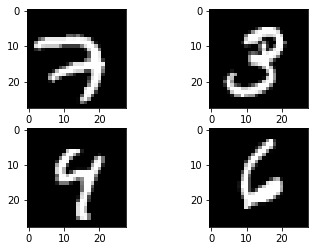

In [ ]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

#plt.subplot(231)
#plt.imshow(X_train[4], cmap=plt.get_cmap('gray'))
#plt.subplot(232)
#plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))
#plt.subplot(233)
#plt.imshow(X_train[6], cmap=plt.get_cmap('gray'))
#plt.subplot(234)
#plt.imshow(X_train[7], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

In [ ]:
print(X_train.shape)
print(X_test.shape)

print(X_train[0])

print(y_train.shape)
print(y_train[:20])

print(y_test.shape)
print(y_test[:20])

(55000, 28, 28)
(10000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  97  96  77 118  61   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  90 138 235 235 23

3-dimensional array of instance,image width and image height. 

explore data using histogram?

# Data Pre-processing

# **(a) Scaling**
- to normalize inputs from 0-255 to 0-1

In [ ]:
#X - do scaling
# normalize inputs from 0-255 to 0-1 , no need call standard scalar
X_train = X_train / 255
X_test = X_test / 255

# **(b) One-Hot encoding**

so that 1 integer can represent 10 output neurons using softmax activation
convert 1 single column to 10 columns
-separate neuron for each output class

We need convert the digit integer into a representation that can fit 10 output neurons. And use softmax activation. One-hot encode the values. I0-I1-I2-I3-I4-I5-I6-I7-I8-I9
0-0-0-0-1-0-0-0-0-0

4=0-0-0-0-1-0-0-0-0-0



In [ ]:

# Y - one hot encode outputs so as to represent 10 outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
print(num_classes)

10


# Model used - Complex CNN

- less trainable weight (due to max pooling)







model consist of :

(a) Input Layer :

Convolutional Layer: Conv2D - filter size (3,3), 30 filters

Pooling Layer : MaxPooling2D - pool size (2,2) to downsize the image and hence reduce the trainable parameters

Best Practices - All layers use the ReLU activation function and the he_uniform kernel initializer ( weight initialization scheme)

(B) Hidden Layers:

Convolutional Layer: Conv2D - filter size (3,3), 15 filters
Pooling Layer : MaxPooling2D - pool size (2,2) 

Dropout Layer : For  regularization - randomly reducing the number of interconnecting neurons within a neural network based on the given probability (0.5) to avoid overfitting.

Flatten Layer :  flattens input image data into a one-dimensional array.

Dense Layer: to interpret the features with 100 nodes

Dense Layer: to interpret the features with 50 nodes


(C) Output Layer:

Dense Layer : - With 10 neurons/nodes to predict the image belonging to one of the 10 digits (0-9) using softmax activation function


Compile the model with  categorical cross-entropy loss function optimized with adam optimizer and the classification accuracy metric


# Hyperparameters tuning:


**Number of epochs**

- tune from 10 to 20 until the gap between the test error and the training error is small

- As the epoch increased from 10 to 99, the error gradually drop to below 6 but this increases the training time as the training set will have to pass the network 99 times!

**Batch size**

- tested from 16 to 100 to 150 to 200
- as batch size increases, the error gradually decrease


**Number of hidden layers and units**

- Added 1 pair of Convolution layer and Pooling layer besides the input layer pair
- Added 2 dense layers

until test error no longer improves. 

**Dropout for regularization**

- tune from 0.2 to 0.5 to increase the probability of dropping out the nodes in the neural network to regularize to avoid overfitting


In [6]:
# Complex CNN Model
import numpy
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical

from keras.layers import BatchNormalization
from keras.optimizers import SGD

# fix random seed for reproducibility
seed = 88
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Data Pre-processing

num_pixels = X_train.shape[1] * X_train.shape[2]
print(num_pixels)

# flatten 28*28 pixel images to a 784 pixels vector (single array) for each image
#convert from integer to float (0 (black) -255(white) )
#convert float because matix multiplcation in neural network works better with float
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

#X - do scaling
# normalize inputs from 0-255 to 0-1 , no need call standard scalar
X_train = X_train / 255
X_test = X_test / 255

# Y - one hot encode outputs so as to represent 10 outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
print(num_classes)

# build the model
# create model
model = Sequential()

#input layer

#Conv layer (filter layer) need input shape,28x28x1(NHWC) - 1 colour (monochrome)
#filter size (5,5), number of filters=32
#model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu', kernel_initializer='he_uniform'))#0.60%
model.add(MaxPooling2D(pool_size=(2, 2))) #pooling layer is a compression layer - downsize image (insert in between conv layer but don't too much, the original image will be gone)

# Hidden layers
#model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(Conv2D(15, (3, 3), activation='relu', kernel_initializer='he_uniform'))#0.76
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5)) #tune from 0.2 to 0.5
model.add(Flatten())
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))

#output layer - 10 neurons to predict the images of 10 digits (0-9)
model.add(Dense(num_classes, activation='softmax'))

# Compile model
#opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])
print(model.summary())

# Fit the model
historyCOM = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)#0.60

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

784
10
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 375)               0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 375)       

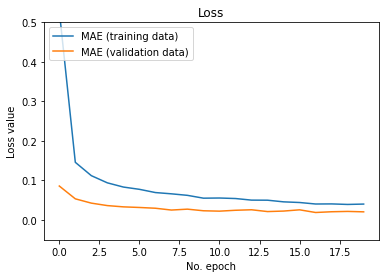

In [8]:
import matplotlib.pyplot as plt
# Plot history: MAE
plt.plot(historyCOM.history['loss'], label='MAE (training data)')
plt.ylim(-0.05, 0.5)
plt.plot(historyCOM.history['val_loss'], label='MAE (validation data)')

plt.title('Loss')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.ylim(-0.05, 0.5)
plt.legend(loc="upper left")
plt.show()

Evaluation - Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

y_pred = model.predict(X_test)

print(y_pred)

# Confusion matrix
#confusion_matrix(y_test, y_pred)

#precision_score(y_test, y_pred)

[[1.63197658e-15 1.31283984e-10 1.00637326e-12 ... 1.00000000e+00
  5.21985536e-15 9.23041366e-11]
 [3.40640127e-10 5.79427760e-05 9.99942064e-01 ... 5.17854426e-09
  2.03801906e-11 2.72724090e-13]
 [1.07323046e-10 9.99999523e-01 4.40671555e-10 ... 4.84548792e-08
  7.01780678e-09 2.94204688e-10]
 ...
 [1.37237859e-19 1.25608562e-12 9.45279769e-16 ... 2.64428263e-13
  1.71683284e-12 2.20733046e-12]
 [6.17268061e-15 1.06518450e-16 4.84890225e-19 ... 8.31369508e-16
  4.29523301e-12 1.51942532e-13]
 [1.38262957e-08 2.97206926e-10 8.36078595e-10 ... 3.22368339e-14
  6.67108537e-08 7.31404780e-12]]


ValueError: ignored

References:

https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/


https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d

https://www.analyticsvidhya.com/blog/2021/06/mnist-dataset-prediction-using-keras/

https://www.kaggle.com/prashant111/mnist-deep-neural-network-with-keras

https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python

https://journalofbigdata.springeropen.com/articles/10.1186/s40537-021-00444-8

https://towardsdatascience.com/implementing-alexnet-cnn-architecture-using-tensorflow-2-0-and-keras-2113e090ad98

https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/


https://www.datacamp.com/community/tutorials/cnn-tensorflow-python

https://towardsdatascience.com/a-walkthrough-of-convolutional-neural-network-7f474f91d7bd


In [9]:
# Complex CNN Model
import numpy
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical

from keras.layers import BatchNormalization
from keras.optimizers import SGD

# fix random seed for reproducibility
seed = 88
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Data Pre-processing

num_pixels = X_train.shape[1] * X_train.shape[2]
print(num_pixels)

# flatten 28*28 pixel images to a 784 pixels vector (single array) for each image
#convert from integer to float (0 (black) -255(white) )
#convert float because matix multiplcation in neural network works better with float
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

#X - do scaling
# normalize inputs from 0-255 to 0-1 , no need call standard scalar
X_train = X_train / 255
X_test = X_test / 255

# Y - one hot encode outputs so as to represent 10 outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
print(num_classes)

# build the model
# create model
model = Sequential()

#input layer

#Conv layer (filter layer) need input shape,28x28x1(NHWC) - 1 colour (monochrome)
#filter size (5,5), number of filters=32
model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu', kernel_initializer='he_uniform'))#0.60%
model.add(MaxPooling2D(pool_size=(2, 2))) #pooling layer is a compression layer - downsize image (insert in between conv layer but don't too much, the original image will be gone)

# Hidden layers
model.add(Conv2D(15, (3, 3), activation='relu', kernel_initializer='he_uniform'))#0.76
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5)) #tune from 0.2 to 0.5
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))

#output layer - 10 neurons to predict the images of 10 digits (0-9)
model.add(Dense(num_classes, activation='softmax'))

# Compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])
print(model.summary())

# Fit the model
historyCOM = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)#0.60

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

784
10
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)       